delete les zone 1 et 5

la zone 2 (csv) c'est la zone orange,
la zone 3 (csv) c'est la zone verte,
la zone 4 (csv) c'est la zone bleue,


# Etape 1 : Nettoyage

In [78]:
import pandas as pd




with open('Donné\\1-Raw\\catastrophes_naturelles.csv', 'r') as f:
    lines =  f.readlines()

processed_lines = []
for line in lines:
    line = line.strip()
    if line.startswith('"') and line.endswith('"'):
        line = line[1:-1]
        if line.endswith('""'):
            line = line[:-2] + '"'
            line = line.replace(',""', ',"')
    processed_lines.append(line)

with open('Donné\\2-Interim\\catastrophes_naturelles_without_quotation.csv', 'w') as f:
    for line in processed_lines:
        f.write(line + '\n')

In [79]:
file_path = "Donné\\2-Interim\\catastrophes_naturelles_without_quotation.csv"  
df = pd.read_csv(file_path)

df = df.drop(df.columns[0], axis=1)
df.to_csv('Donné\\3-External\\your_file_modified.csv', index=False)



Analyse des possibilité de chaque collonnes pour savoir lesquelles gardés

In [80]:
file_path = "Donné\\3-External\\your_file_modified.csv"  
df = pd.read_csv(file_path)
valeurs_uniques = df["pluie_intensite_max"].unique()

# Afficher chaque valeur unique
for valeur in valeurs_uniques:
    print(valeur)

0.0
0.1
0.3
0.2


delete pluie_intensite_max

In [81]:
df_dropped_labels = df.drop(columns=['pluie_intensite_max'])
df_dropped_labels.to_csv('Donné\\4-Processed\\clean_file.csv', index=False)



In [82]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("Donné\\4-Processed\\clean_file.csv")

# Remove rows where 'quartier' is 'Zone 1' or 'Zone 5'
df_filtre = df[~df['quartier'].isin(['Zone 1', 'Zone 5'])]

# Save the cleaned DataFrame to a new file (or overwrite the old one)
df_filtre.to_csv("Donné\\4-Processed\\clean_file.csv", index=False)


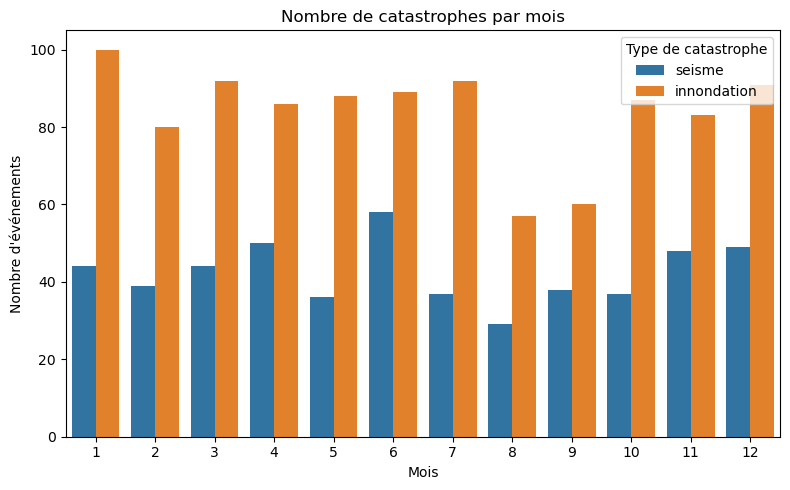

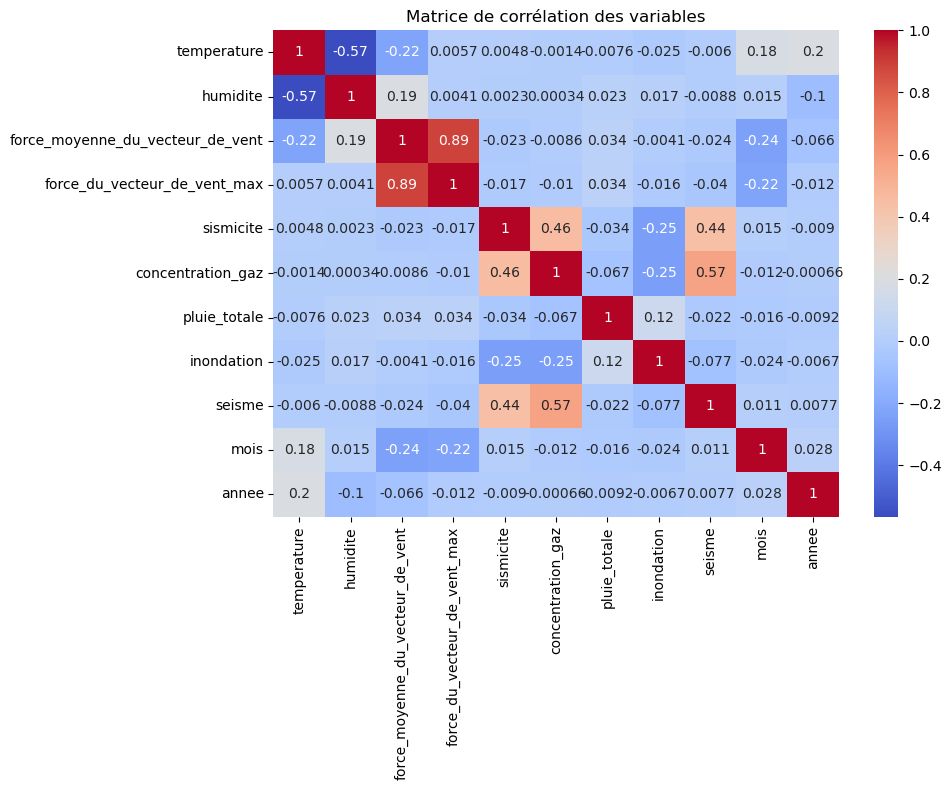

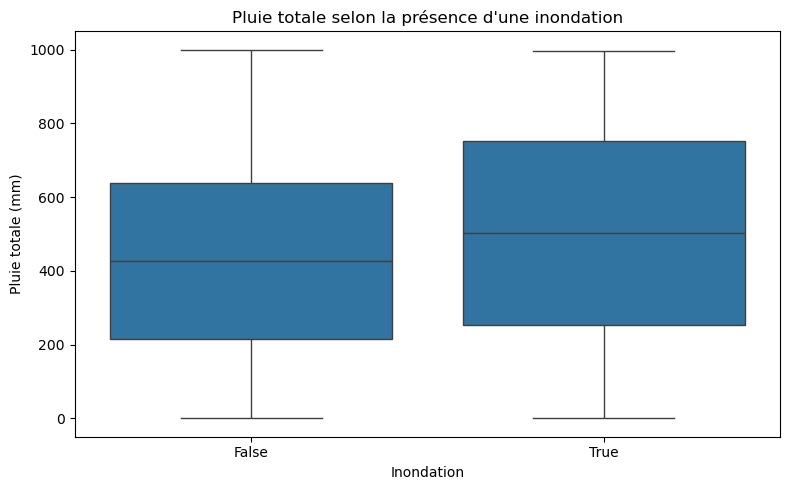

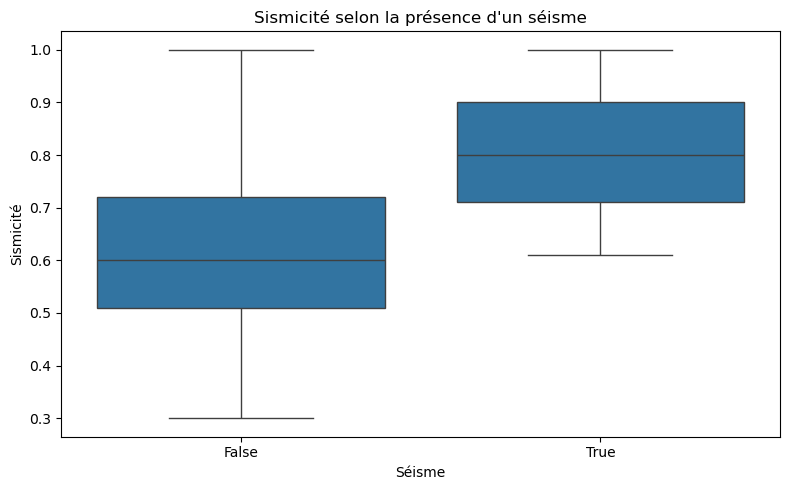

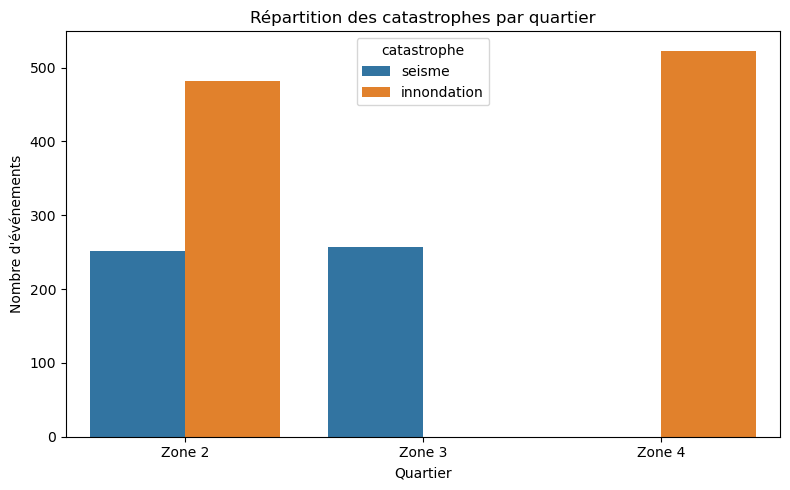